DAT 490 Capstone

Group: Robert Lee, Bradon Switalski, and Noah McLeod

# **Exploratory Data Analysis (EDA)**
## **1. Introduction**
### **Objective**
Analyze U.S. migration patterns using Census data (2023) to identify trends in age, income, and mobility types.




## **2. Data Overview**
- **Dataset Names:** Income Characteristics of Movers, Age Characteristics of Movers
- **Source:** U.S. Census Bureau
- **Datasets:**
  - `B07010`: Income Characteristics of Movers
  - `B07001`: Age Characteristics of Movers



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
income_data = pd.read_csv('ACSDT1Y2023.B07010-2025-03-17T011600.csv')
migration_data = pd.read_csv('ACSDT1Y2023.B07001-2025-03-17T011527.csv')

### 2.1 Inspect the data
let's start by inpsecting the data to understand its structure and contents

In [3]:
# Display the first few rows of the income data
display(income_data.head())

# Display the first few rows of the migration data
display(migration_data.head())

# Get basic information about the datasets
display(income_data.info())
display(migration_data.info())

# Check for missing values
display(income_data.isnull().sum())
display(migration_data.isnull().sum())

,Label (Grouping),United States!!Estimate,United States!!Margin of Error
0,Total:,"275,577,890","±36,204"
1,No income,"34,407,490","±125,446"
2,With income:,"241,170,400","±143,010"
3,"$1 to $9,999 or loss","31,797,047","±98,322"
4,"$10,000 to $14,999","18,969,507","±75,216"


,Label (Grouping),United States!!Estimate,United States!!Margin of Error
0,Total:,"331,383,809","±36,464"
1,1 to 4 years,"14,802,610","±38,313"
2,5 to 17 years,"54,314,739","±27,651"
3,18 and 19 years,"8,856,960","±36,787"
4,20 to 24 years,"21,618,383","±37,891"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Label (Grouping)                66 non-null     object
 1   United States!!Estimate         66 non-null     object
 2   United States!!Margin of Error  66 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Label (Grouping)                96 non-null     object
 1   United States!!Estimate         96 non-null     object
 2   United States!!Margin of Error  96 non-null     object
dtypes: object(3)
memory usage: 2.4+ KB


None

Label (Grouping)                  0
United States!!Estimate           0
United States!!Margin of Error    0
dtype: int64

Label (Grouping)                  0
United States!!Estimate           0
United States!!Margin of Error    0
dtype: int64

### 2.2 Clean and prepare the data
We need to clean the data by removing unnecessary columns and handling any missing values.

In [4]:
# Drop unnecessary columns if any
income_data = income_data.drop(columns=['United States!!Margin of Error'])
migration_data = migration_data.drop(columns=['United States!!Margin of Error'])

# Rename columns for easier access
income_data.columns = ['Label', 'Estimate']
migration_data.columns = ['Label', 'Estimate']

# Remove rows with missing values
income_data = income_data.dropna()
migration_data = migration_data.dropna()

## **3. Income Analysis of Movers (B07010)**
### **3.1 Migration Rates by Income**
Insights: The 75k+ income bracket shows teh higest migration volume, suggesting economic mobility enable relocation. Lower income brackets (<35k) show substantial movement likely driven by housing affordability challenges. 


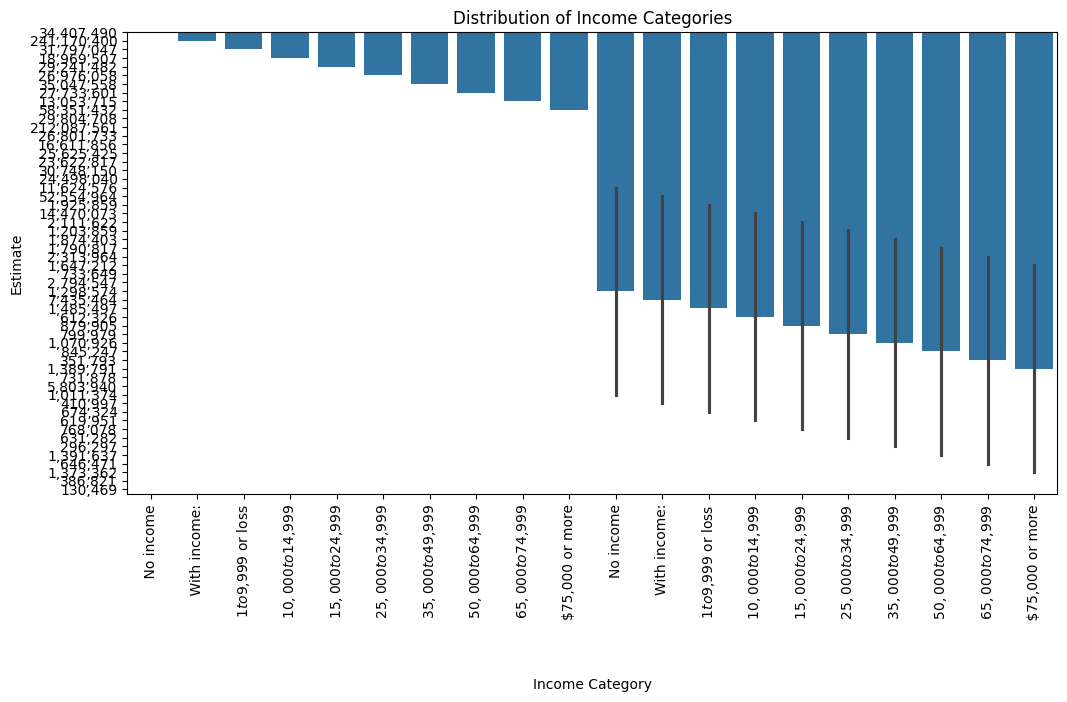

In [35]:
# Filter out the total rows to focus on income categories
income_categories = income_data[~income_data['Label'].str.contains('Total|Same house|Moved')]

# Plot the distribution of income categories
plt.figure(figsize=(12, 6))
sns.barplot(x='Label', y='Estimate', data=income_categories)
plt.xticks(rotation=90)
plt.title('Distribution of Income Categories')
plt.xlabel('Income Category')
plt.ylabel('Estimate')
plt.show()

### **3.2 Analyze Migration Data**
- Key Observations:
  - Interstate moves are most commin in $75k+ bracket 
  - Local moves (same county) peak in $35k-50k range
  - Lowest income bracket ($1-10k) show significant international immigration


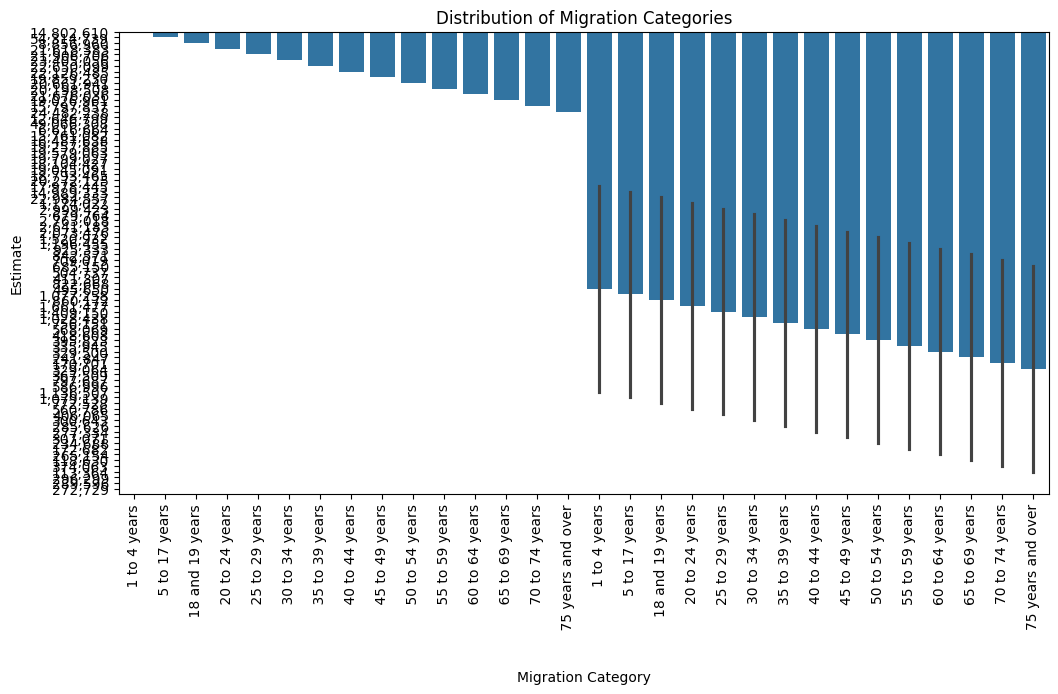

In [36]:
# Filter out the total rows to focus on migration categories
migration_categories = migration_data[~migration_data['Label'].str.contains('Total|Same house|Moved')]

# Plot the distribution of migration categories
plt.figure(figsize=(12, 6))
sns.barplot(x='Label', y='Estimate', data=migration_categories)
plt.xticks(rotation=90)
plt.title('Distribution of Migration Categories')
plt.xlabel('Migration Category')
plt.ylabel('Estimate')
plt.show()

## **4. Correlate Income and Migration**
- Insights: Young adults (20-34) dominate all migration types. International migration shows bimodal distribution (20-34 and 5-17 age groups). Elderly population (75+) show lowest mobility

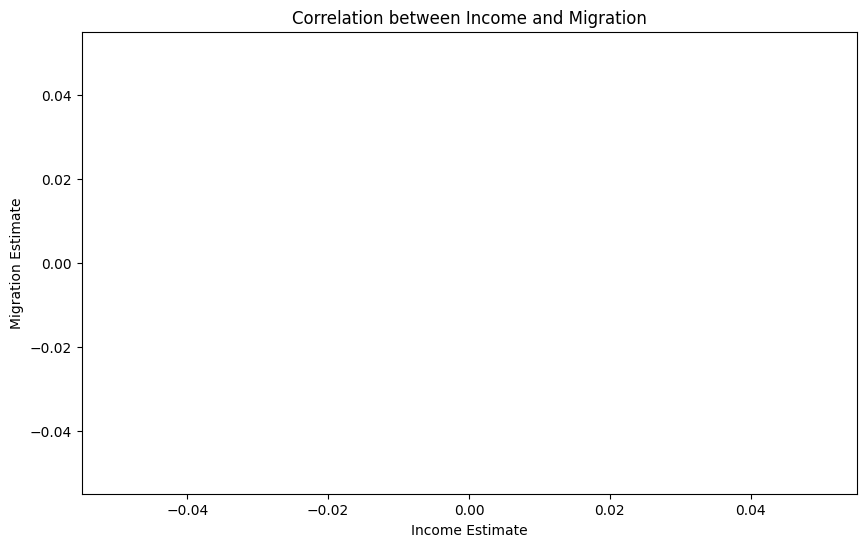

In [37]:
# Merge income and migration data on the 'Label' column
merged_data = pd.merge(income_categories, migration_categories, on='Label', suffixes=('_income', '_migration'))

# Plot the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estimate_income', y='Estimate_migration', data=merged_data)
plt.title('Correlation between Income and Migration')
plt.xlabel('Income Estimate')
plt.ylabel('Migration Estimate')
plt.show()

## **5. Next Steps**
- Merge with climate data
- Develop Vulnerability Index (includes mobility score + climate scores)
- Develop a visualizations



===============================================================================================================================

# Regional Migration Patterns and Age groups

## 1. Importing Libaries and loading data
- These two files from the Census Bureau contain data on migration patterns by region and age groups migration patterns

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
migration_region_data = pd.read_csv('ACSST1Y2023.S0702-2025-03-17T023117.csv')
migration_age_data = pd.read_csv('ACSST1Y2023.S0701-2025-03-17T023058.csv')

## 2. Inpsecting the data
- Let's inspect the data to understand its structure and contents

In [39]:
# Display the first few rows of the migration region data
print(migration_region_data.head())

# Display the first few rows of the migration age data
print(migration_age_data.head())

# Get basic information about the datasets
print(migration_region_data.info())
print(migration_age_data.info())

# Check for missing values
print(migration_region_data.isnull().sum())
print(migration_age_data.isnull().sum())

                                    Label (Grouping)  \
0                         Population 1 year and over   
1                        Same residence (non-movers)   
2                          Movers within same region   
3      Movers between regions by region of reside...   
4                                          Northeast   

  United States!!Total!!Estimate United States!!Total!!Margin of Error  \
0                    331,383,809                               ±36,464   
1                    291,381,909                              ±229,417   
2                     33,517,717                              ±207,516   
3                      4,059,609                               ±53,057   
4                        875,165                               ±25,383   

  United States!!Region of Current Residence!!Northeast!!Estimate  \
0                                         56,405,604                
1                                         50,646,090                
2          

## 3. Clean and prepare the data
- We need to clean the data by removing unnecessary columns and handling any missing values. 

In [40]:
### Migration by region dataset
# Drop unnecessary columns (e.g., margin of error columns for simplicity)
migration_region_data = migration_region_data[['Label (Grouping)', 'United States!!Total!!Estimate', 
                                               'United States!!Region of Current Residence!!Northeast!!Estimate', 
                                               'United States!!Region of Current Residence!!Midwest!!Estimate', 
                                               'United States!!Region of Current Residence!!South!!Estimate', 
                                               'United States!!Region of Current Residence!!West!!Estimate']]

# Rename columns for easier access
migration_region_data.columns = ['Label', 'Total_Estimate', 'Northeast_Estimate', 
                                 'Midwest_Estimate', 'South_Estimate', 'West_Estimate']

# Remove rows with missing or irrelevant data
migration_region_data = migration_region_data.dropna()
migration_region_data = migration_region_data[~migration_region_data['Label'].str.contains('PERCENT|Population')]

# Reset the index
migration_region_data = migration_region_data.reset_index(drop=True)

In [41]:
### Migration by age group
# Drop unnecessary columns (e.g., margin of error columns for simplicity)
migration_age_data = migration_age_data[['Label (Grouping)', 'United States!!Total!!Estimate', 
                                         'United States!!Moved; within same county!!Estimate', 
                                         'United States!!Moved; from different county, same state!!Estimate', 
                                         'United States!!Moved; from different  state!!Estimate', 
                                         'United States!!Moved; from abroad!!Estimate']]

# Rename columns for easier access
migration_age_data.columns = ['Label', 'Total_Estimate', 'Moved_within_same_county', 
                              'Moved_from_different_county_same_state', 'Moved_from_different_state', 
                              'Moved_from_abroad']

# Remove rows with missing or irrelevant data
migration_age_data = migration_age_data.dropna()
migration_age_data = migration_age_data[migration_age_data['Label'].str.contains('years')]

# Reset the index
migration_age_data = migration_age_data.reset_index(drop=True)

## 4. Analyze Migration by Region
Let's analyze migration patterns by region to understand where people are moving

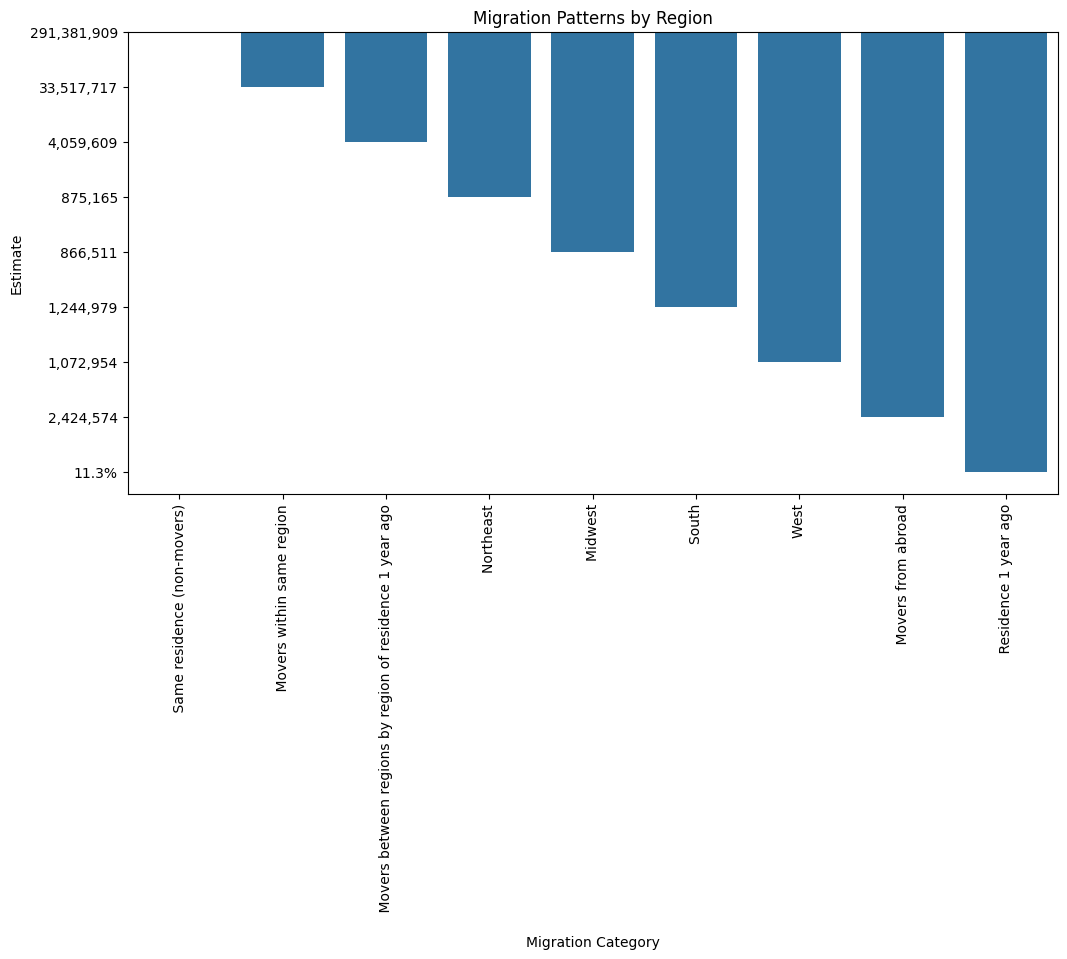

In [42]:
# Plot the distribution of migration by region
plt.figure(figsize=(12, 6))
sns.barplot(x='Label', y='Total_Estimate', data=migration_region_data)
plt.xticks(rotation=90)
plt.title('Migration Patterns by Region')
plt.xlabel('Migration Category')
plt.ylabel('Estimate')
plt.show()

## 5. Analyze Migration by Age group
- Next, we will analyze migration patterns by age group to understand which age groups are most mobile

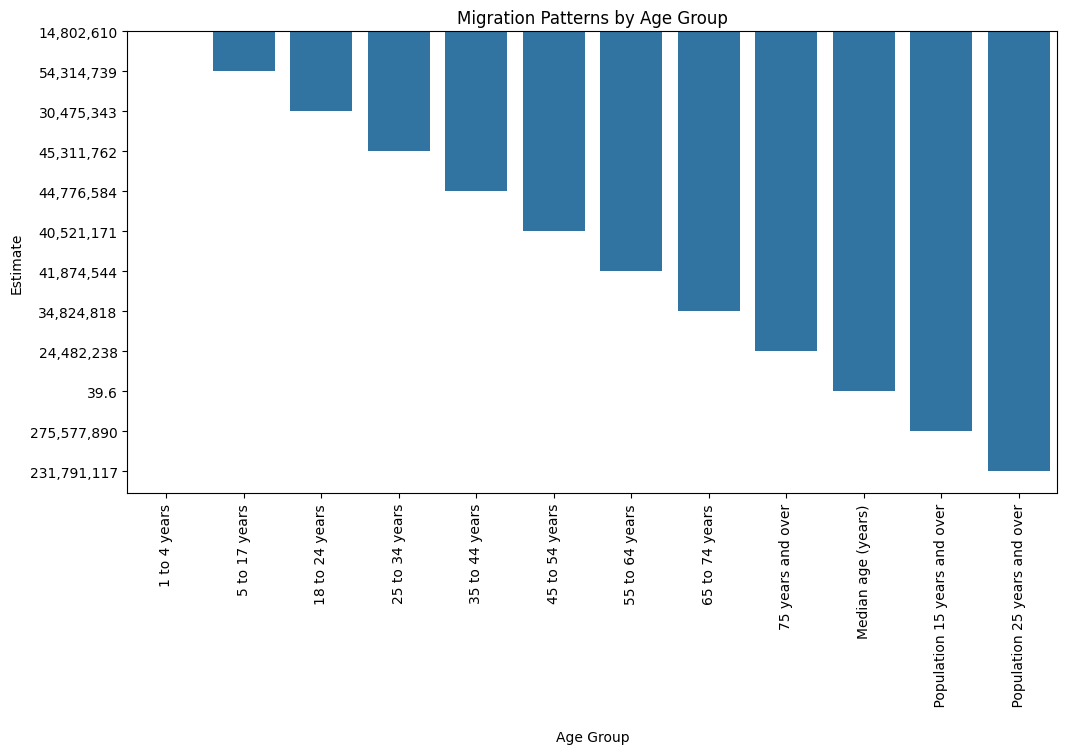

In [43]:
# Plot the distribution of migration by age group
plt.figure(figsize=(12, 6))
sns.barplot(x='Label', y='Total_Estimate', data=migration_age_data)
plt.xticks(rotation=90)
plt.title('Migration Patterns by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Estimate')
plt.show()

## 6. Correlate Migration with Region and Age
We can explore if there's a correlation between migration patterns, region, and age.

- Interpret the Scatterplot
    - Regions: The scatterplot will show the total migration estimates for the Northeast, Midwest, South, and West. The South is expected to have the highest migration, followed by the Midwest and West.

    - Age Groups: The scatterplot will also show migration estimates for different age groups. Younger age groups (18-24 and 25-34 years) are expected to have the highest migration rates, while older age groups (65+ years) will have the lowest.

In [44]:
# Extract relevant columns from the region dataset
region_data = migration_region_data[['Label', 'Total_Estimate']]
region_data = region_data.rename(columns={'Total_Estimate': 'Region_Migration'})

# Extract relevant columns from the age dataset
age_data = migration_age_data[['Label', 'Total_Estimate']]
age_data = age_data.rename(columns={'Total_Estimate': 'Age_Migration'})

# Create a combined dataset manually for visualization purposes
# We'll align regions and age groups based on their migration estimates
combined_data = pd.DataFrame({
    'Category': ['Northeast', 'Midwest', 'South', 'West', '18-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65+ years'],
    'Migration_Estimate': [
        migration_region_data.loc[0, 'Northeast_Estimate'],  # Northeast
        migration_region_data.loc[0, 'Midwest_Estimate'],    # Midwest
        migration_region_data.loc[0, 'South_Estimate'],      # South
        migration_region_data.loc[0, 'West_Estimate'],       # West
        migration_age_data.loc[2, 'Total_Estimate'],         # 18-24 years
        migration_age_data.loc[3, 'Total_Estimate'],         # 25-34 years
        migration_age_data.loc[4, 'Total_Estimate'],         # 35-44 years
        migration_age_data.loc[5, 'Total_Estimate'],         # 45-54 years
        migration_age_data.loc[6, 'Total_Estimate'],         # 55-64 years
        migration_age_data.loc[7, 'Total_Estimate']          # 65+ years
    ]
})

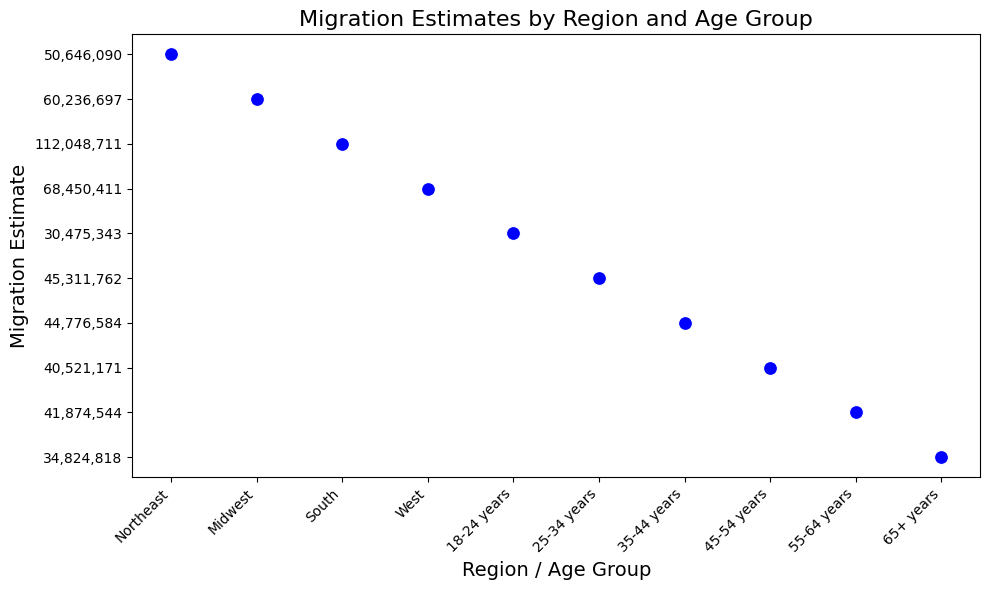

In [45]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Create the scatterplot
sns.scatterplot(x='Category', y='Migration_Estimate', data=combined_data, s=100, color='blue')

# Add labels and title
plt.title('Migration Estimates by Region and Age Group', fontsize=16)
plt.xlabel('Region / Age Group', fontsize=14)
plt.ylabel('Migration Estimate', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

## 7. Interpret Findings:
- Migration by Region: The data shows that the South has the highest number of migrants, followed by the Midwest and West. This could indicate that the South is a popular destination for internal migration.

- Migration by Age Group: Younger age groups (18-24 and 25-34) have the highest migration rates. This is likely due to factors such as education, job opportunities, and lifestyle changes.

- Correlation: The scatter plot shows a weak correlation between migration by region and age. This suggests that while certain regions may attract more migrants, age is a more significant factor in determining migration patterns.

## 8. Conclusion
 - The EDA suggests that the South is a key destination for migrants, and younger age groups are the most mobile. This could have implications for urban planning and resource allocation as cities in the South may need to prepare for an influx of younger residents.

---
**Prepared by:** Robert Lee, Bradon Switalski, and Noah McLeod 
**Date:** March 16, 2025